# K Means Clustering Projekt mit PCA

Für dieses Projekt werden wir versuchen K Means Clustering zu verwenden, um Universitäten in den USA in zwei Gruppen zu unterteilen: Private und öffentliche.


# Die Daten

Wir verwenden einen DataFrame mit 770 Beobachtungen und den folgenden 18 Variablen:

* Private: Dummy Varaible mit "Yes" für private und "No" für öffentliche Einrichtungen
* Apps: Anzahl an erhaltenen Bewerbungen
* Accept: Anzahl an angenommenen Bewerbungen
* Enroll: Anzahl neu eingeschriebener Studenten
* Top10perc: Prozent der neuen Studenten der Top 10% einer High School Klasse
* Top25perc: Prozent der neuen Studenten der Top 25% einer High School Klasse
* F.Undergrad: Anzahl an Vollzeitstudenten
* P.Undergrad: Anzahl an Teilzeitstudenten
* Outstate: Gebühr für Studenten, die aus einem anderen Staat kommen
* Room.Board: Kosten für Räume und Mitarbeiter
* Books: Geschätze Kosten für Bücher
* Personal: Geschätzte persönliche Ausgaben
* PhD: Prozent der Fakultäten mit Ph.D.'s
* Terminal: Prozent der Fakultäten mit Terminal Degree
* S.F.Ratio: Rate der Studenten pro Fakultät
* perc.alumni: Prozent der Alumni die spenden
* Expend: Verwaltungskosten pro Student
* Grad.Rate: Abschlussrate

In [234]:

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Die Daten

** Lies die CSV-Datei "College_Data" mit `read_csv` ein. Finde heraus, wie du die erste Spalte als Index definierst.**

In [235]:
df = pd.read_csv('College_Data.csv',index_col=0)

In [236]:
df.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [237]:
df.shape

(777, 18)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [239]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


**Setzte für diese Universität die Abschlussrate ("Grad.Rate") auf 100, damit es Sinn ergibt.**

In [240]:
df.loc['Cazenovia College', 'Grad.Rate'] = 100

In [241]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


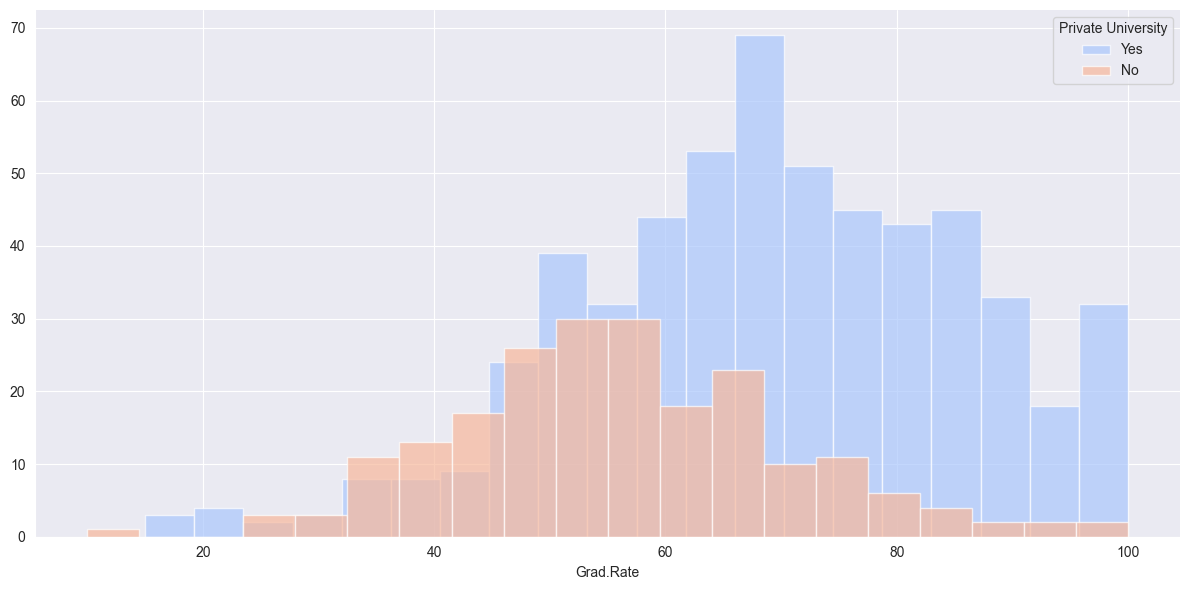

In [242]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)
plt.legend(title="Private University")
plt.show()

# Merkmale zusammenfassen
Benutze pca und aus den gegebenen Merkmalen zwei Hauptkomponenten zu erstellen. Die Spalte `Private` ist dabei kein Merkmal und muss zuvor entfernt werden.<br>
Erstelle zuerst ein Objekt der Klasse `PCA` und transformiere damit die Merkmale (z.B. mit `fit_transform()`).Das Ergebnis ist ein Array mit Anzahl Spalten == Anzahl Hauptkomponenten.<br>
Erstelle daraus ein DataFrame mit den Spalten `Hauptk.1` und `Hauptk.2`

In [243]:
features=df.drop('Private', axis=1)# (ohne target)

In [244]:
#Skalierung der Daten
scaler = StandardScaler()
scaler.fit(features)

StandardScaler()

In [245]:
scaled_data = scaler.transform(features)

In [246]:
# PCA für 2 Hauptkomponenten
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [247]:
principal_components = pca.fit_transform(scaled_data) # Model tainieren

In [248]:
principal_df = pd.DataFrame(data=principal_components, columns=['H_Komp_1', 'H_Komp_2'])
principal_df

,H_Komp_1,H_Komp_2
0,-1.593465,0.764438
1,-2.192662,-0.581414
2,-1.430232,-1.094707
3,2.857842,-2.625830
4,-2.217581,0.020114
...,...,...
772,-3.332003,1.215705
773,0.202815,-0.687321
774,-0.734073,-0.077822
775,7.923810,-2.056648


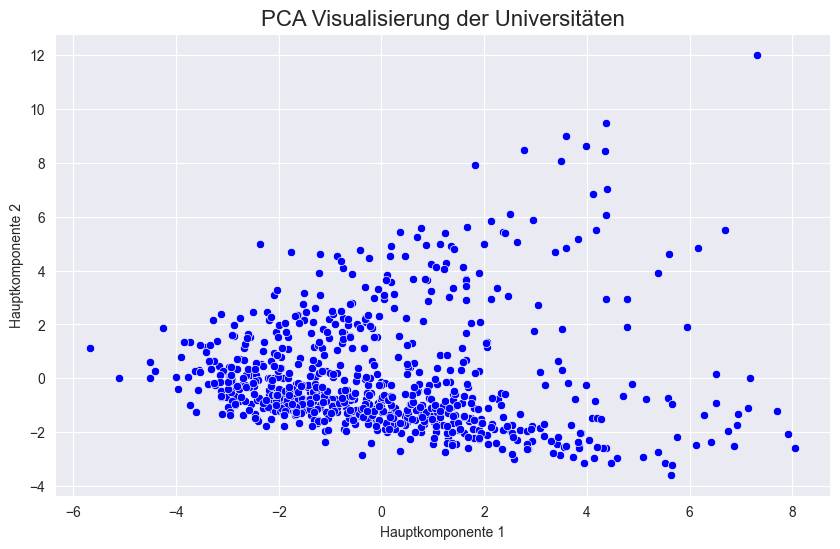

In [249]:
# Visualisierung der ersten beiden Hauptkomponenten
plt.figure(figsize=(10, 6))

sns.scatterplot(x=principal_df['H_Komp_1'], y=principal_df['H_Komp_2'], color='blue')

plt.title('PCA Visualisierung der Universitäten', fontsize=16)
plt.xlabel('Hauptkomponente 1')
plt.ylabel('Hauptkomponente 2')

plt.show()


Bei der Principal Component Analysis (PCA) wird die Varianz verwendet, um die "wichtigsten" Dimensionen in den Daten zu identifizieren. Diese Dimensionen sind die Hauptkomponenten (Principal Components), und jede Hauptkomponente erklärt einen bestimmten Anteil der gesamten Varianz in den Daten.<br>
In diesem Kontext bezieht sich Varianz auf die Streuung oder Verteilung der Datenpunkte entlang einer bestimmten Achse oder Dimension. Sie gibt an, wie weit die Datenpunkte im Vergleich zum Mittelwert der jeweiligen Dimension voneinander entfernt sind. Eine hohe Varianz bedeutet, dass die Daten weit auseinanderliegen, während eine niedrige Varianz darauf hinweist, dass die Daten nahe beieinander liegen.<br>

Das Objekt der Klasse `PCA` enthält ein Attribut `explained_variance_ratio_`. Das ist ein Array, der die von der jeweiligen Komponente (in unserem Fall sind es nur 2 Komponenten) erklärte Varianz beinhaltet. <br>
Berechne wieviel Varianz der Ausgangsdaten durch die Hauptkomponenten erklärt wird:

In [250]:
explained_variance = pca.explained_variance_ratio_
print(f"Erklärte Varianz durch Hauptkomponente 1: {explained_variance[0]:.2f}")
print(f"Erklärte Varianz durch Hauptkomponente 2: {explained_variance[1]:.2f}")
print(f"Gesamte erklärte Varianz: {sum(explained_variance):.2f}")


Erklärte Varianz durch Hauptkomponente 1: 0.32
Erklärte Varianz durch Hauptkomponente 2: 0.26
Gesamte erklärte Varianz: 0.58


# K Means Cluster erstellen

Jetzt ist es Zeit unsere Cluster zu erstellen!

**Importiere KMeans from SciKit Learn.**

In [251]:
from sklearn.cluster import KMeans

**Erstelle eine Instanz von einem K Means Modell mit 2 Clustern.**

In [252]:
# K-Means Algorithmus
kmeans = KMeans(n_clusters=2, random_state=42)  # 2 Cluster 



In [253]:
df.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [254]:
kmeans.fit_transform(principal_df )

array([[1.74628243, 4.81677081],
       [1.68687321, 6.06019955],
       [1.04751029, 5.83357186],
       ...,
       [0.57154094, 4.62256221],
       [8.55433608, 7.40842884],
       [0.96657856, 4.12525685]])

In [255]:
kmeans.cluster_centers_

array([[-0.5059128 , -0.60184648],
       [ 2.61388279,  3.10954013]])

In [256]:
principal_df['Cluster'] = kmeans.predict(principal_df);

**Fitte das Modell auf das DataFrame mit den beiden Hauptkomponenten.**

**Visualisiere das Ergebniss mit einem Scatterplot in 2 verschieden Farben je Cluster**<br>
Erzeuge dazu eine Spalte `Cluster` im DataFrame und benutze entweder `labels_` oder die `predict()` Methode des Modellobjekts.

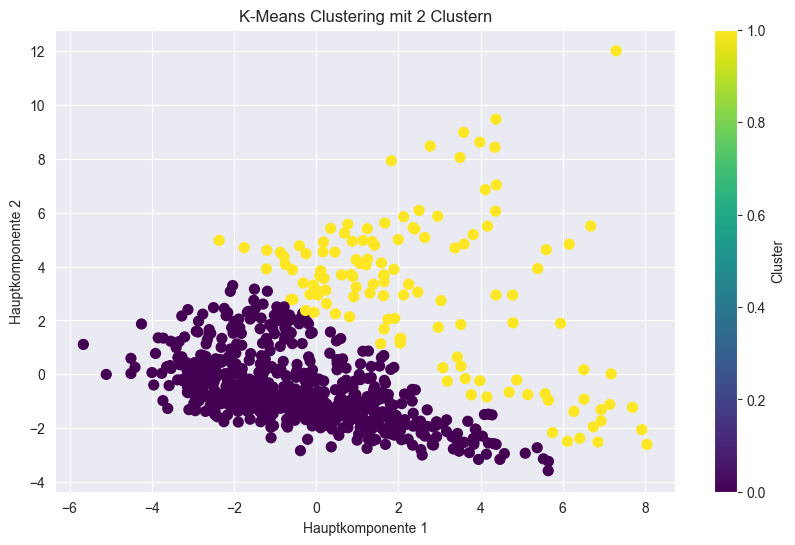

In [257]:
#  Visualisierung der Cluster
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['H_Komp_1'], principal_df['H_Komp_2'], c=principal_df['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering mit 2 Clustern')
plt.xlabel('Hauptkomponente 1')
plt.ylabel('Hauptkomponente 2')
plt.colorbar(label='Cluster')
plt.show()

# Auswertung

Welcher Cluster gehört nun zu unserer Zielvariable `Private` ?<br>
Wir können unserem neuen DatFrame die Zielvariable aus den Ausgangsdaten hinzufügen. Allerdings haben die beiden keinen gemeinsamen Index mehr.<br>
Versuchen wir es mit dem Attribut `.values` der Spalte, dann ist der Index egal.<br>
Mit `groupby` können wir die Werte für `Cluster` und `Private` vergleichen.
Wenn die Werte nicht zusammen passen (mehr falsche als richtige für beide Cluster), dann invertieren (umdrehen) wir sie einfach. 

In [258]:
df.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


**Erstelle eine Confusion Matrix und den Classification Report, um zu sehen wie gut unser K Means Clustering die Universitäten zugeordnet hat.**<br>
In der Spalte `Private` steht der Ziel- bzw. wahre Wert, in der Spalte `Cluster` die Vorhersage bzw. Clusterzuweisung.

In [259]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay

In [260]:
df['Private'] = df['Private'].map({"Yes": 1, "No": 0})
df['Private'].value_counts()

Private
1    565
0    212
Name: count, dtype: int64

In [270]:
principal_df['Cluster'].value_counts()

Cluster
0    651
1    126
Name: count, dtype: int64

In [261]:
# Hinzufügen  der Zielvariable 'Private' dem DataFrame mit den Hauptkomponenten
principal_df['Private'] = df['Private'].values

In [271]:
# Eintraege 'umdrehen'
principal_df['Cluster'] = principal_df['Cluster'].map({0 : 1, 1: 0})
principal_df['Cluster'].value_counts()

Cluster
1    651
0    126
Name: count, dtype: int64

In [263]:
# Vergleichen der Cluster mit der Zielvariable 'Private'

# unstack() wandelt eine Ebene des Multi-Index in Spalten um, 
# sodass die Daten breiter und tabellarischer dargestellt werden.
cluster_private_comparison = principal_df.groupby(['Cluster', 'Private']).size().unstack() 
print(cluster_private_comparison)

Private    1
Cluster     
0        651
1        126


In [267]:
cluster_private_comparison = principal_df.groupby(['Cluster', 'Private']).size().unstack()
cluster_private_comparison = cluster_private_comparison.T  # Transponiert die Tabelle
print(cluster_private_comparison)


Cluster    0    1
Private          
1        651  126


In [272]:
# Erstellen einer Confusion Matrix und des Classification Reports
conf_matrix = confusion_matrix(df['Private'], principal_df['Cluster'])
class_report = classification_report(df['Private'], principal_df['Cluster'])

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[ 86 126]
 [ 40 525]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.41      0.51       212
           1       0.81      0.93      0.86       565

    accuracy                           0.79       777
   macro avg       0.74      0.67      0.69       777
weighted avg       0.77      0.79      0.77       777



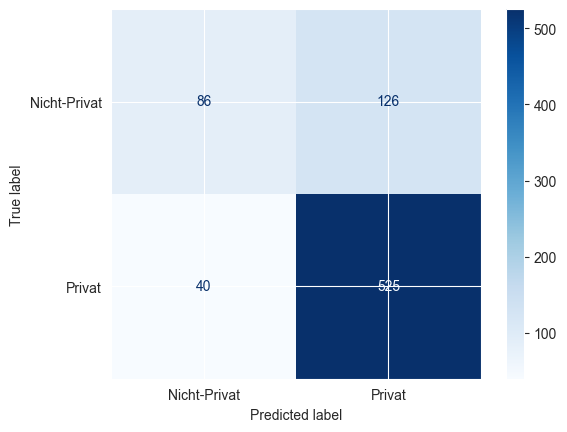

In [273]:
# Anzeige der Confusion Matrix
disp = ConfusionMatrixDisplay(conf_matrix , display_labels=['Nicht-Privat', 'Privat'])
disp.plot(cmap='Blues', colorbar=True)
plt.show()

